In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [9]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [10]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [13]:
df.shape

(397, 6)

Display Stastic for numeric column

In [14]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [15]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [16]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


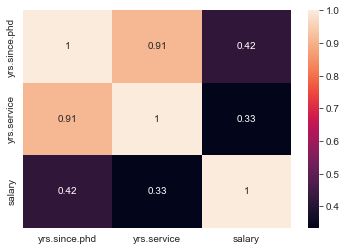

In [17]:
corrMatrix=df.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

here yrs of service,year since phd show negative correlation with salary

In [21]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

# plot bar title

<AxesSubplot:title={'center':'sex'}>

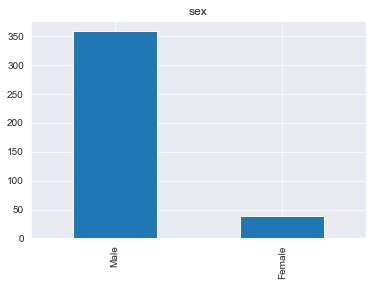

In [22]:
df['sex'].value_counts().plot.bar(title='sex')

In [24]:
df_sorted=df.sort_values(by='yrs.service')
df_sorted

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
154,AsstProf,B,4,0,Male,92000
127,AsstProf,A,2,0,Female,72500
164,AsstProf,B,1,0,Male,88795
28,AsstProf,B,11,0,Male,77000
287,AsstProf,A,2,0,Male,85000
...,...,...,...,...,...,...
350,Prof,B,56,49,Male,186960
282,Prof,A,51,51,Male,57800
194,AssocProf,B,48,53,Male,90000
131,Prof,A,56,57,Male,76840


#sort data frame by yers.service and overwrite the original dataset

In [25]:
df.sort_values(by='yrs.service',ascending=False,inplace=True)
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
330,Prof,B,49,60,Male,192253
131,Prof,A,56,57,Male,76840
194,AssocProf,B,48,53,Male,90000
282,Prof,A,51,51,Male,57800
285,AssocProf,A,49,49,Male,81800


Mapping of data featured value

Displine columns is in catagorical form for model training we want to convert it into numeric values

In [26]:
df['discipline']=df['discipline'].map({'A':1,'B':2})
df['discipline'].head(10)

330    2
131    1
194    2
282    1
285    1
125    1
350    2
276    1
279    1
261    1
Name: discipline, dtype: int64

# Data visualization

using seaborn and matplot lib we can visualize the data and find best pattern.
we ploy a histogram for salary attribute

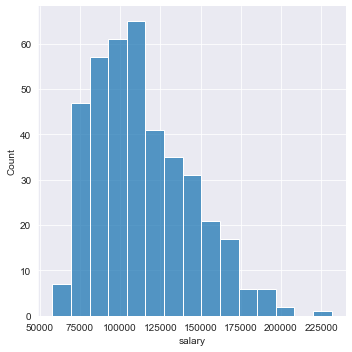

In [28]:
sns.displot(df['salary']);

<AxesSubplot:xlabel='rank'>

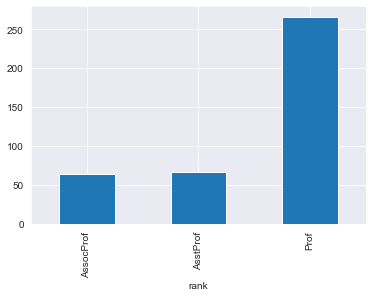

In [30]:
df.groupby(['rank'])['salary'].count().plot(kind='bar')

here we see according to rank salary goes on increase, prof has more salary then ass.prof

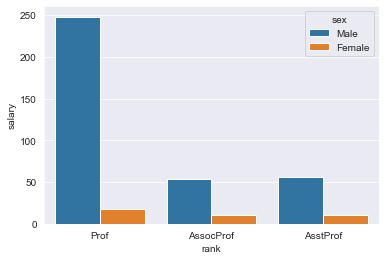

In [32]:
ax=sns.barplot(x='rank',y='salary',hue='sex',data=df,estimator=len)

here we see most of the maleProf having high salary according to female

if we intersted for linear regression for 2 numeric data we plot regplot

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

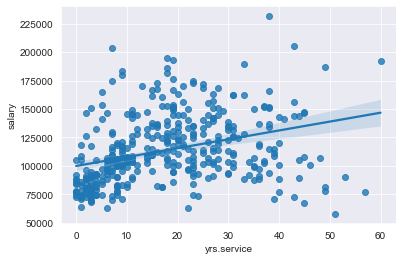

In [35]:
sns.regplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

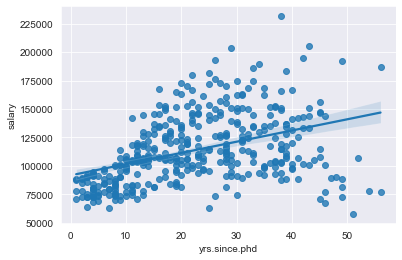

In [36]:
sns.regplot(x='yrs.since.phd',y='salary',data=df)

we plot all numeric values so we understand how they corelate with each other

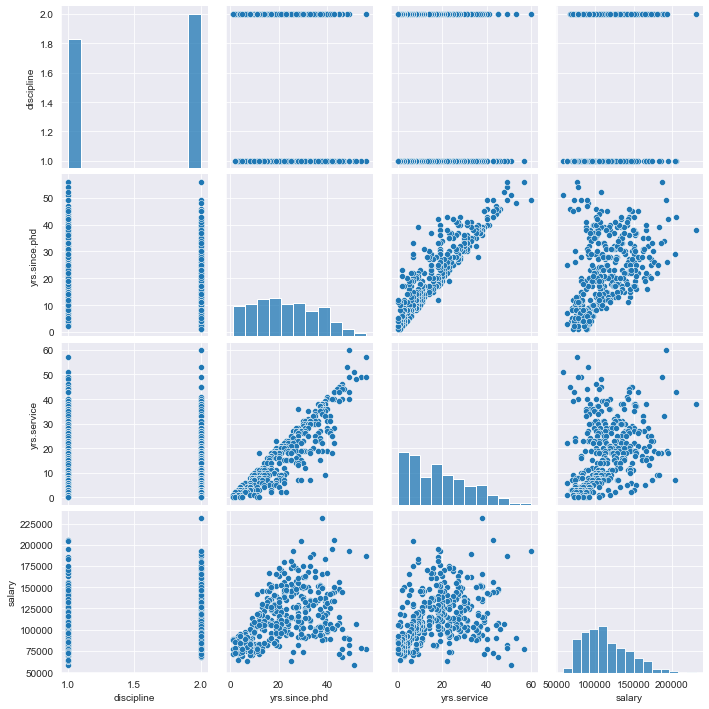

In [37]:
sns.pairplot(df)